<a href="https://colab.research.google.com/github/yejiikim/DataScience/blob/main/TermProject_9%EC%A1%B0_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0  [70-80)               8.0              72.0             1           18.0   
1  [70-80)               3.0              34.0             2           13.0   
2  [50-60)               5.0              45.0             0           18.0   
3  [70-80)               2.0              36.0             0           12.0   
4  [60-70)               1.0              42.0             0            7.0   

   n_outpatient  n_inpatient  n_emergency medical_specialty       diag_1  \
0             2            0            0           Missing  Circulatory   
1             0            0            0             Other        Other   
2             0            0            0           Missing  Circulatory   
3             1            0            0           Missing  Circulatory   
4             0            0            0  InternalMedicine        Other   

        diag_2       diag_3 glucose_test A1Ctest change diabetes_med

<ipython-input-15-8d0002d246c6>:72: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, 0] = label_encoder.fit_transform(data.iloc[:, 0])
<ipython-input-15-8d0002d246c6>:73: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, 8:] = data.iloc[:, 8:].apply(lambda x: label_encoder.fit_transform(x))
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to i

One-Hot Encoded Data:
        medical_specialty_0  medical_specialty_1  medical_specialty_2  \
0                      0.0                  0.0                  0.0   
1                      0.0                  0.0                  0.0   
2                      0.0                  0.0                  0.0   
3                      0.0                  0.0                  0.0   
4                      0.0                  0.0                  0.0   
...                    ...                  ...                  ...   
24995                  0.0                  0.0                  0.0   
24996                  0.0                  0.0                  0.0   
24997                  0.0                  0.0                  0.0   
24998                  0.0                  0.0                  1.0   
24999                  0.0                  0.0                  0.0   

       medical_specialty_3  medical_specialty_4  medical_specialty_5  \
0                      0.0              

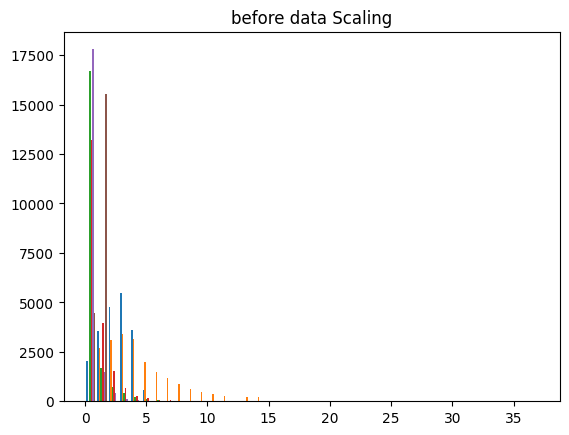

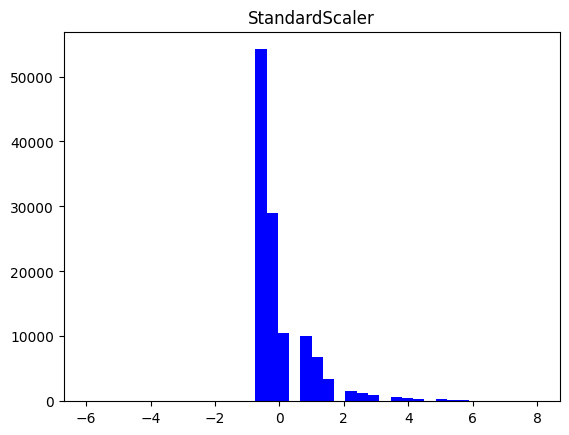

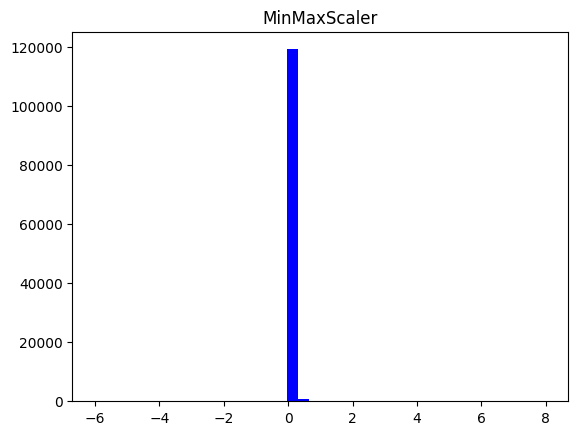

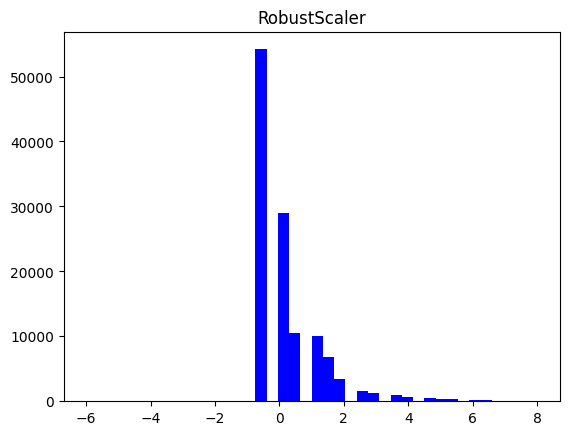

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#저희 data가 missing value가 없어서
#랜덤으로 missing value 만들어서 진행했습니다..!
'''
dataset = pd.read_csv("hospital_readmissions.csv")

# 랜덤한 row 인덱스 선택
random_row_indices1 = np.random.choice(dataset.index, 564, replace=False)
random_row_indices2 = np.random.choice(dataset.index, 896, replace=False)
random_row_indices3 = np.random.choice(dataset.index, 458, replace=False)
random_row_indices4 = np.random.choice(dataset.index, 362, replace=False)
random_row_indices5 = np.random.choice(dataset.index, 617, replace=False)
random_row_indices6 = np.random.choice(dataset.index, 552, replace=False)

# 선택된 row의 값을 결측값으로 변경
dataset.loc[random_row_indices1, 'time_in_hospital'] = np.nan
dataset.loc[random_row_indices2, 'n_lab_procedures' ] = np.nan
dataset.loc[random_row_indices3, 'n_medications'] = np.nan

dataset.loc[random_row_indices4, 'diag_1'] = np.nan
dataset.loc[random_row_indices5, 'A1Ctest'] = np.nan
dataset.loc[random_row_indices6, 'diabetes_med'] = np.nan

# 수정된 데이터프레임을 새로운 CSV 파일로 저장
dataset.to_csv("modified_hospital_readmissions.csv", index=False)
'''

data = pd.read_csv("modified_hospital_readmissions.csv")

print(data.head(5))
print(data.shape)
print(data.index)
print(data.columns)

# Check for the Missing value
print(data.isnull().sum())

# Calculate column mean
lab_mean=data['n_lab_procedures'].mean()
time_mean=data['time_in_hospital'].mean()
med_mean=data['n_medications'].mean()

# Fill missing values with mean
data['n_lab_procedures'].fillna(lab_mean, inplace=True)
data['time_in_hospital'].fillna(time_mean, inplace=True)
data['n_medications'].fillna(med_mean, inplace=True)

# Calculate mode for each column
mode_values = data.mode().iloc[0]

# Replace missing values with mode
data['diag_1'].fillna(mode_values['diag_1'],inplace=True)
data['A1Ctest'].fillna(mode_values['A1Ctest'],inplace=True)
data['diabetes_med'].fillna(mode_values['diabetes_med'],inplace=True)

#Check for the Missing value
print(data.isnull().sum())

#Label Encoding(Main Encoder)
label_encoder = LabelEncoder()
data.iloc[:, 0] = label_encoder.fit_transform(data.iloc[:, 0])
data.iloc[:, 8:] = data.iloc[:, 8:].apply(lambda x: label_encoder.fit_transform(x))

print(data)

# One-hot encoder
onehot_encoder = OneHotEncoder(sparse=False)
# Ordinal encoder
ordinal_encoder = OrdinalEncoder()

# select categorical columns to perform one-hot encoding and ordinal encoding
categorical_cols = data.columns[8:]

# one-hot encoding
onehot_encoded_data = onehot_encoder.fit_transform(data[categorical_cols])
onehot_encoded_df = pd.DataFrame(onehot_encoded_data, columns = onehot_encoder.get_feature_names_out(categorical_cols))

# ordinal encoding
ordinal_encoded_data = ordinal_encoder.fit_transform(data[categorical_cols])
ordinal_encoded_df = pd.DataFrame(ordinal_encoded_data, columns = categorical_cols)

# print encoded data
print("One-Hot Encoded Data:\n", onehot_encoded_df)
print("\nOrdinal Encoded Data:\n", ordinal_encoded_df)

#분석 때 필요할 거 같은 데이터 모아봤습니다!!
''' 
age = data.iloc[:, 0].values #환자의 연령대
time_hospital= data.iloc[:, 1].values #입원 기간(1~14)
outpatient=data.iloc[:, 5].values #입원 전 1년간 외래 진료 방문 횟수
inpatient=data.iloc[:, 6].values #입원 전 1년간 입원 진료 방문 횟수
emergency=data.iloc[:, 7].values #입원 전 1년간 응급실 방문 횟수
diabetes_med=data.iloc[:, -2].values #당뇨병 관련 약물 처방 여부
readmitted= data.iloc[:, -1].values #환자의 입원 재입원 여부
'''

# Split the dataset into training and test set
X=data[['age','time_in_hospital','n_outpatient','n_inpatient','n_emergency','diabetes_med']]
y=data['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=False,random_state=1004)

pd.set_option('display.max_columns', 100)

print('X_train:',X_train)
print('y_train:',y_train)
print('X_test:',X_test)
print('y_test:',y_test)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


# Feature scaling using StandardScaler
standard_X=StandardScaler()
X_train_scaled = standard_X.fit_transform(np.array(X_train).reshape(-1, 1))
X_test_scaled = standard_X.transform(np.array(X_test).reshape(-1, 1))

# Feature scaling using MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(np.array(X_train).reshape(-1, 1))
X_test_minmax = minmax_scaler.transform(np.array(X_test).reshape(-1, 1))

# Feature scaling using RobustScaler
robust_scaler = RobustScaler()
X_train_robust = robust_scaler.fit_transform(np.array(X_train).reshape(-1, 1))
X_test_robust = robust_scaler.transform(np.array(X_test).reshape(-1, 1))

print('X_train:',X_train_scaled)
print('X_test:',X_test_scaled)

# Plot histogram before scaling
plt.hist(X_train,bins=40)
plt.title('before data Scaling')
plt.show()

# Plot histogram after Standard scaling
plt.hist(X_train_scaled,bins=40,color='blue',range=(-6, 8))
plt.title('StandardScaler')
plt.show()

# Plot histogram after MinMax scaling
plt.hist(X_train_minmax, bins=40, color='blue', range=(-6, 8))
plt.title('MinMaxScaler')
plt.show()

# Plot histogram after Robust scaling
plt.hist(X_train_robust, bins=40, color='blue', range=(-6, 8))
plt.title('RobustScaler')
plt.show()



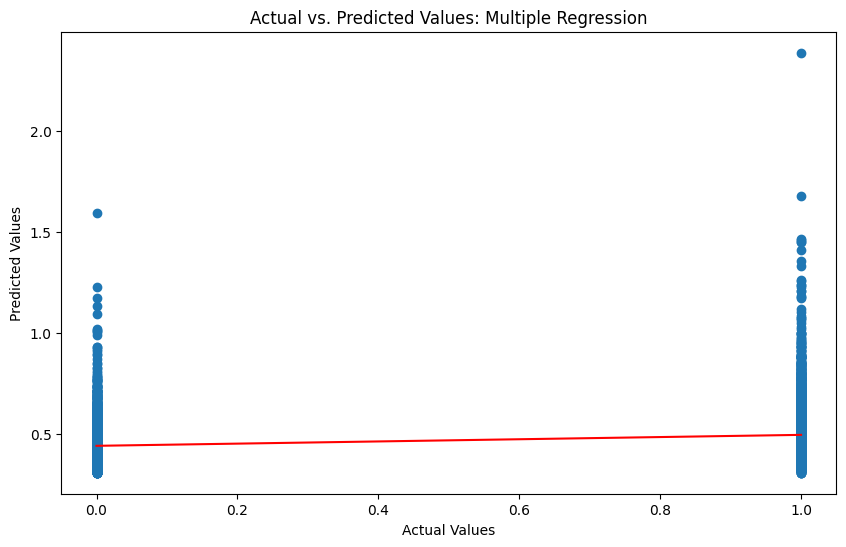

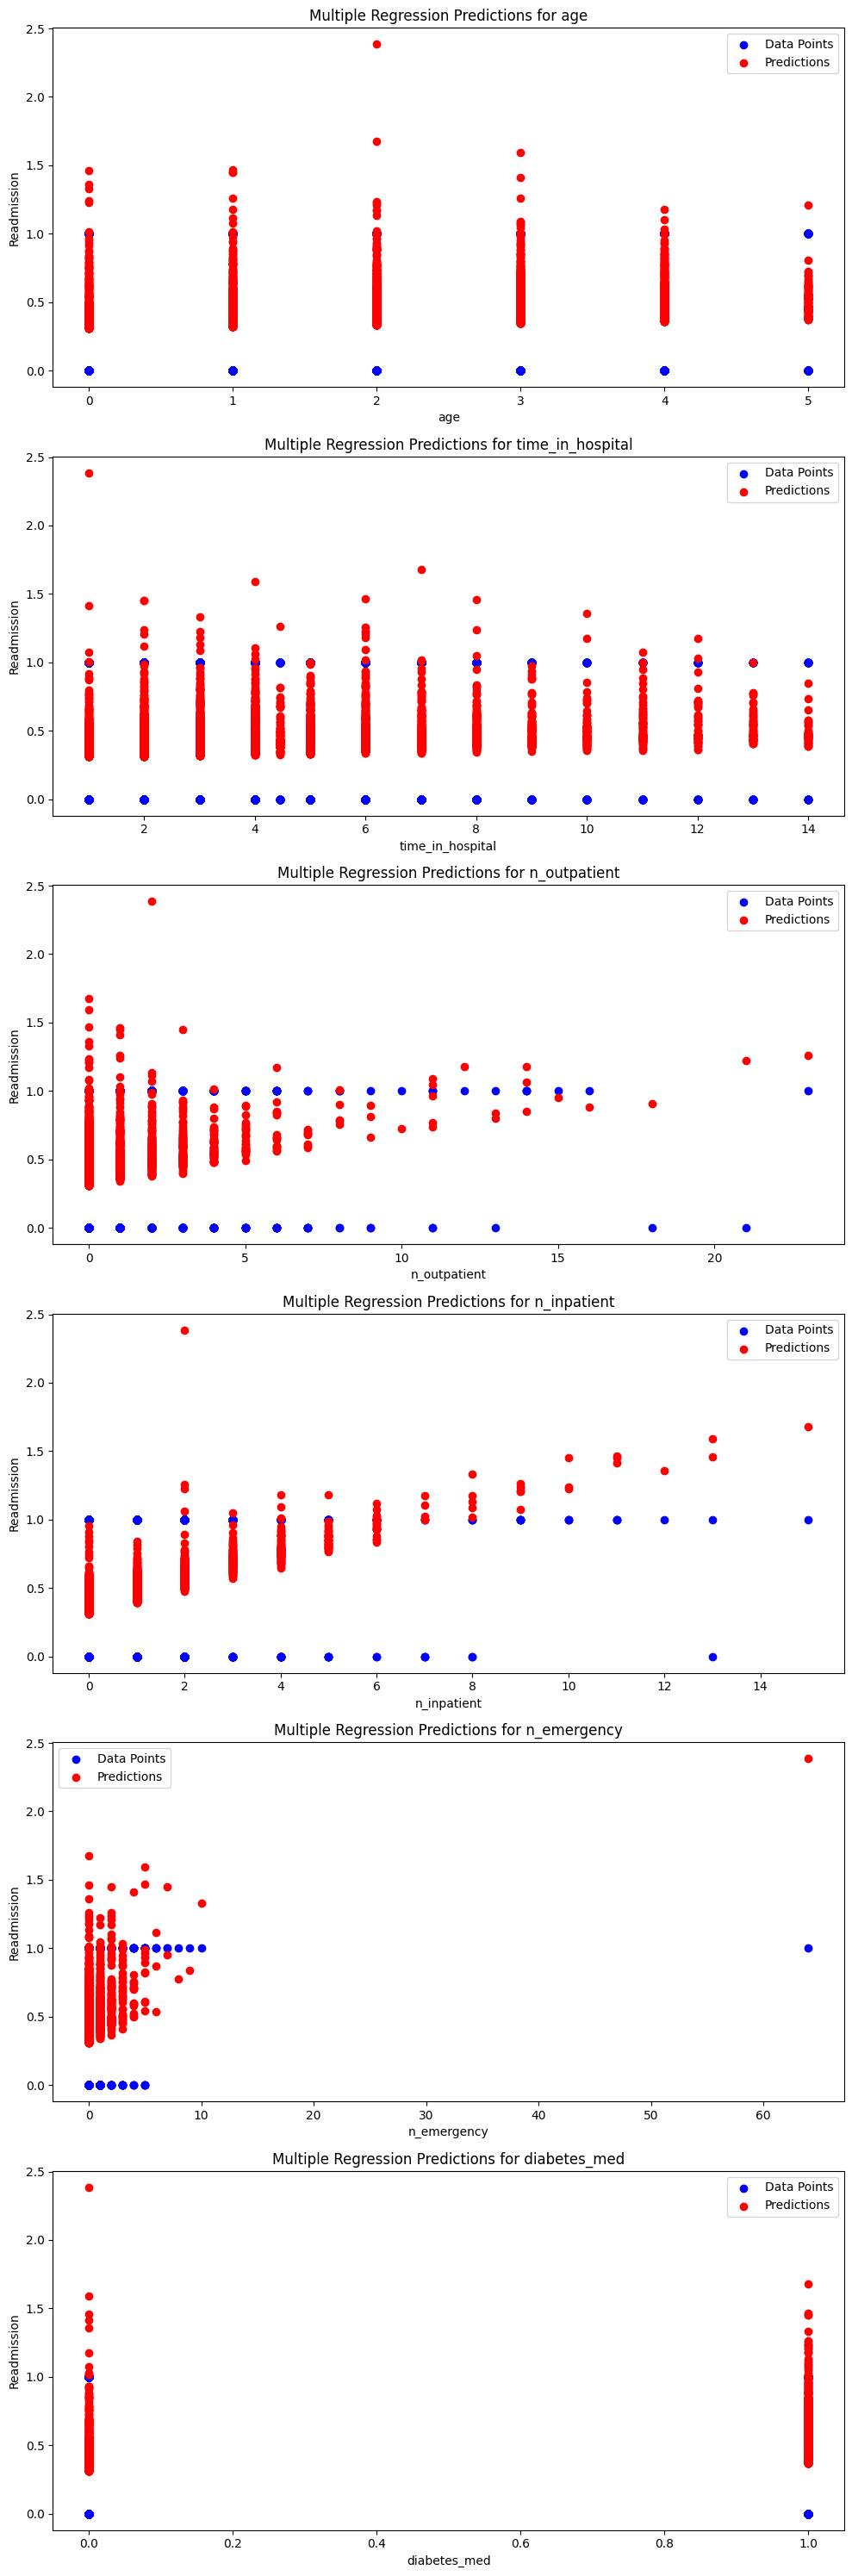

K-Fold Cross-Validation Results for Multiple Regression:  0.05524978057965224


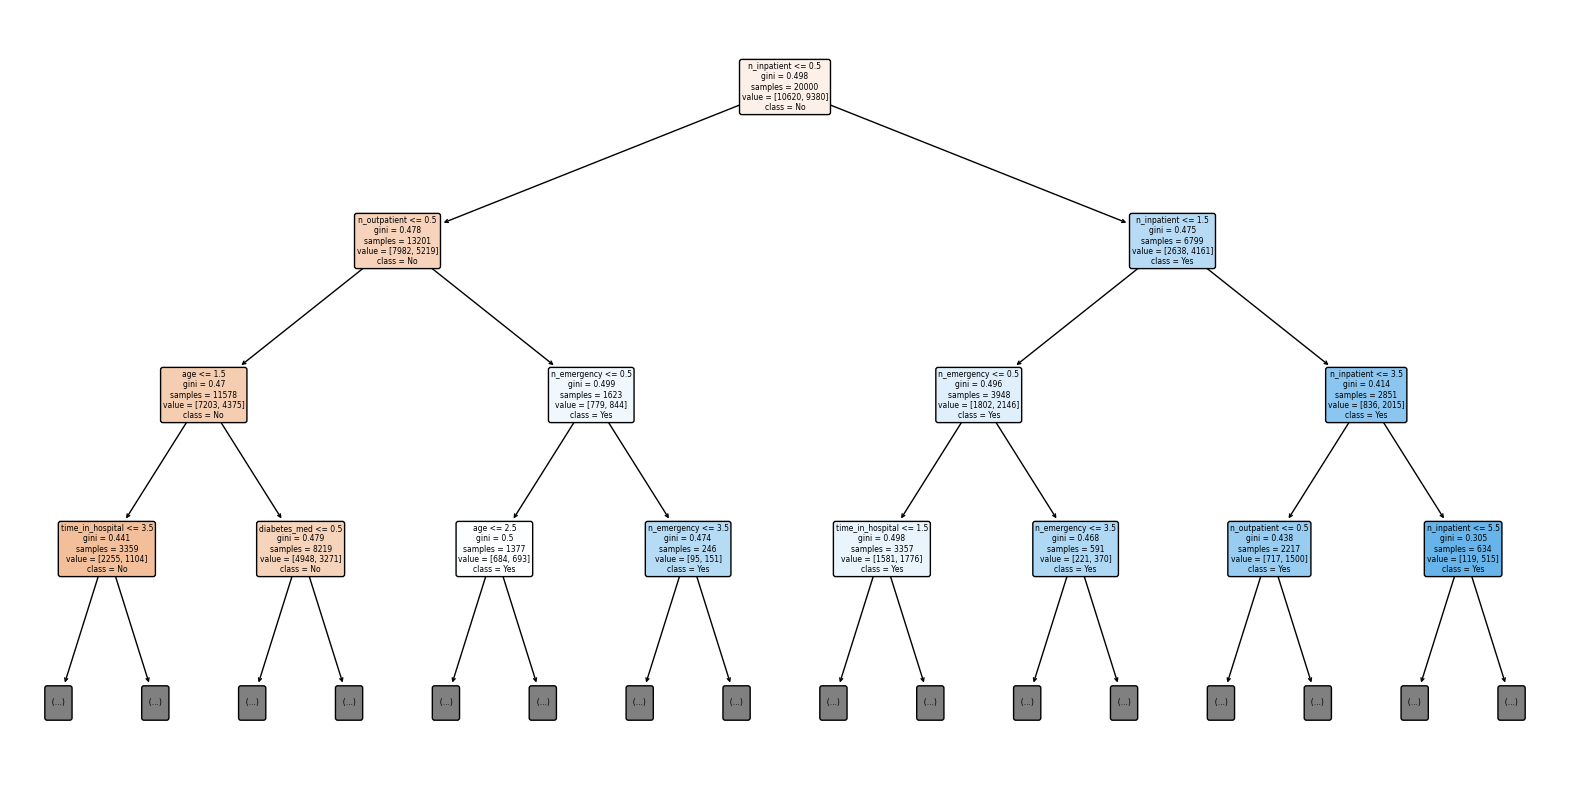

K-Fold Cross-Validation Results for Decision Tree Classifier:  0.5826


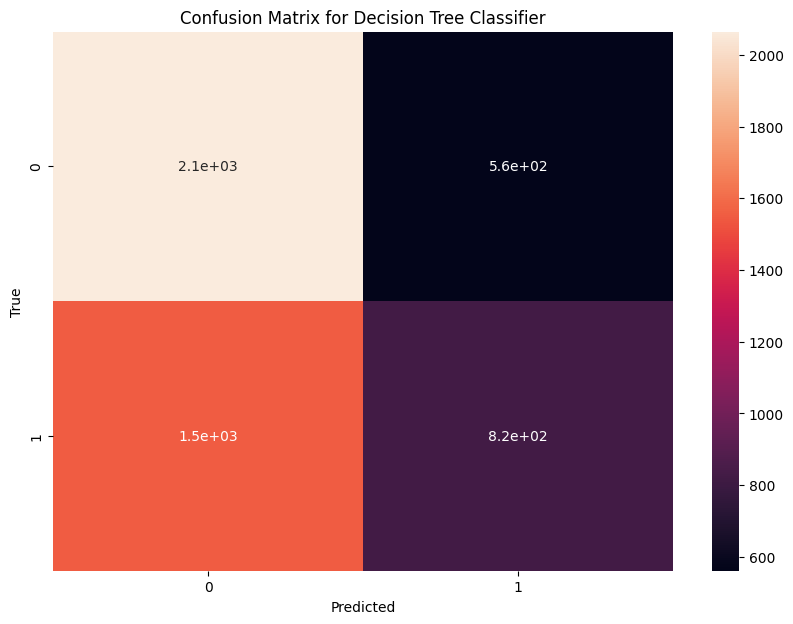

K-Fold Cross-Validation Results for Logistic Regression:  0.60624
Accuracy of Logistic Regression:  0.5904


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


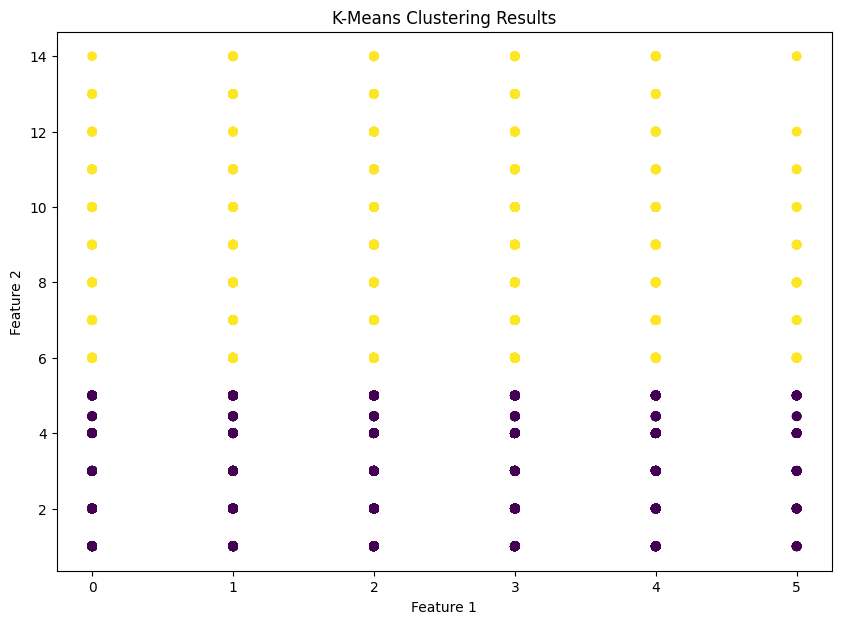

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Continue with the preprocessed data from the reference code
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=False,random_state=1004)

# 1. Algorithm1- Regression
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values: Multiple Regression")

# adding a trendline
line = np.poly1d(np.polyfit(y_test, y_pred_linear, 1))
plt.plot(y_test, line(y_test), color='red')
plt.show()

# Visualization of Regression Results
fig, axs = plt.subplots(6, figsize=(10,30))
features = ['age', 'time_in_hospital', 'n_outpatient', 'n_inpatient', 'n_emergency', 'diabetes_med']
for i, feature in enumerate(features):
    axs[i].scatter(X_test[feature], y_test, color='blue', label='Data Points')
    axs[i].scatter(X_test[feature], y_pred_linear, color='red', label='Predictions')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Readmission")
    axs[i].set_title(f"Multiple Regression Predictions for {feature}")
    axs[i].legend()
plt.tight_layout()
plt.show()

# Cross-validation for Linear Regression
kfold = KFold(n_splits=10, random_state=1, shuffle=True)
linear_cv_results = cross_val_score(linear_model, X, y, cv=kfold, scoring='r2')
print("K-Fold Cross-Validation Results for Multiple Regression: ", linear_cv_results.mean())


# Algorithm2- Classification
# 1) Decision Tree Classifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=["No", "Yes"], rounded=True, max_depth=3)
plt.show()

# Cross-validation for Decision Tree Classifier
kfold = KFold(n_splits=10, random_state=1, shuffle=True)
tree_cv_results = cross_val_score(tree_model, X, y, cv=kfold, scoring='accuracy')
print("K-Fold Cross-Validation Results for Decision Tree Classifier: ", tree_cv_results.mean())

# Visualization of Classification Results
cm = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()


# 2) Logistic Regression 
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Cross-validation for Logistic Regression
logistic_cv_results = cross_val_score(logistic_model, X, y, cv=kfold, scoring='accuracy')
print("K-Fold Cross-Validation Results for Logistic Regression: ", logistic_cv_results.mean())

# Accuracy of Logistic Regression Model
accuracy_logistic = logistic_model.score(X_test, y_test)
print("Accuracy of Logistic Regression: ", accuracy_logistic)

# # Algorithm3- Clustering
# # K-Means Clustering
kmeans_model = KMeans(n_clusters=2, random_state=0) 
kmeans_model.fit(X_train)
y_pred_kmeans = kmeans_model.predict(X_test)


# Visualization of Clustering Results
plt.figure(figsize=(10,7))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred_kmeans)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering Results")
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 1) Decision Tree Classifier with SMOTE
tree_model_smote = DecisionTreeClassifier()
tree_model_smote.fit(X_train_smote, y_train_smote)
y_pred_tree_smote = tree_model_smote.predict(X_test)

# Cross-validation for Decision Tree Classifier with SMOTE
tree_cv_results_smote = cross_val_score(tree_model_smote, X, y, cv=kfold, scoring='accuracy')
print("K-Fold Cross-Validation Results for Decision Tree Classifier with SMOTE: ", tree_cv_results_smote.mean())


# 2) Logistic Regression with SMOTE
logistic_model_smote = LogisticRegression()
logistic_model_smote.fit(X_train_smote, y_train_smote)
y_pred_logistic_smote = logistic_model_smote.predict(X_test)

# Cross-validation for Logistic Regression with SMOTE
logistic_cv_results_smote = cross_val_score(logistic_model_smote, X, y, cv=kfold, scoring='accuracy')
print("K-Fold Cross-Validation Results for Logistic Regression with SMOTE: ", logistic_cv_results_smote.mean())


K-Fold Cross-Validation Results for Decision Tree Classifier with SMOTE:  0.58268
K-Fold Cross-Validation Results for Logistic Regression with SMOTE:  0.60624


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

# 1. Regression - Linear Regression
linear_model = LinearRegression()
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
grid_search_linear = GridSearchCV(estimator=linear_model, param_grid=param_grid, scoring='r2', cv=5)
grid_search_linear.fit(X_train, y_train)
print("Best Parameters for Linear Regression: ", grid_search_linear.best_params_)

# Re-fitting with the best parameters and calculating R2 score
best_linear_model = grid_search_linear.best_estimator_
linear_pred = best_linear_model.predict(X_test)
r2_score_linear = r2_score(y_test, linear_pred)
print("R2 Score for Linear Regression with best parameters: ", r2_score_linear)

# Get top 5 parameter combinations
cv_results = pd.DataFrame(grid_search_linear.cv_results_)
top_five_linear = cv_results.sort_values(by='rank_test_score').head(5)
print("Top 5 Parameter Combinations for Linear Regression: \n", top_five_linear)
print('\n')

# 2. Classification 
# 1) Decision Tree Classifier
tree_model = DecisionTreeClassifier()
param_grid = {'max_depth': range(1, 10), 'criterion': ['gini', 'entropy']}
grid_search_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search_tree.fit(X_train, y_train)
print("Best Parameters for Decision Tree Classifier: ", grid_search_tree.best_params_)

# Re-fitting with the best parameters and calculating accuracy
best_tree_model = grid_search_tree.best_estimator_
tree_pred = best_tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, tree_pred)
print("Accuracy for Decision Tree Classifier with best parameters: ", accuracy_tree)

# Get top 5 parameter combinations
cv_results = pd.DataFrame(grid_search_tree.cv_results_)
top_five_tree = cv_results.sort_values(by='rank_test_score').head(5)
print("Top 5 Parameter Combinations for Decision Tree Classifier: \n", top_five_tree)

# Classification
# 2) Logistic Regression
logistic_model = LogisticRegression()
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
              'C': np.logspace(-4, 4, 20),
              'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
              'max_iter' : [100, 1000,2500, 5000]
             }
grid_search_logistic = GridSearchCV(estimator=logistic_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search_logistic.fit(X_train, y_train)
print("Best Parameters for Logistic Regression: ", grid_search_logistic.best_params_)

# Re-fitting with the best parameters and calculating accuracy
best_logistic_model = grid_search_logistic.best_estimator_
logistic_pred = best_logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, logistic_pred)
print("Accuracy for Logistic Regression with best parameters: ", accuracy_logistic)

# Get top 5 parameter combinations
cv_results = pd.DataFrame(grid_search_logistic.cv_results_)
top_five_logistic = cv_results.sort_values(by='rank_test_score').head(5)
print("Top 5 Parameter Combinations for Logistic Regression: \n", top_five_logistic)

# 3) Random Forest Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

# 1. Regression - Linear Regression
linear_model = LinearRegression()
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
grid_search_linear = GridSearchCV(estimator=linear_model, param_grid=param_grid, scoring='r2', cv=5)
grid_search_linear.fit(X_train, y_train)
print("Best Parameters for Linear Regression: ", grid_search_linear.best_params_)

# Re-fitting with the best parameters and calculating R2 score
best_linear_model = grid_search_linear.best_estimator_
linear_pred = best_linear_model.predict(X_test)
r2_score_linear = r2_score(y_test, linear_pred)
print("R2 Score for Linear Regression with best parameters: ", r2_score_linear)

# Get top 5 parameter combinations
cv_results = pd.DataFrame(grid_search_linear.cv_results_)
top_five_linear = cv_results.sort_values(by='rank_test_score').head(5)
print("Top 5 Parameter Combinations for Linear Regression: \n", top_five_linear)
print('\n')

# 2. Classification 
# 1) Decision Tree Classifier
tree_model = DecisionTreeClassifier()
param_grid = {'max_depth': range(1, 10), 'criterion': ['gini', 'entropy']}
grid_search_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search_tree.fit(X_train, y_train)
print("Best Parameters for Decision Tree Classifier: ", grid_search_tree.best_params_)

# Re-fitting with the best parameters and calculating accuracy
best_tree_model = grid_search_tree.best_estimator_
tree_pred = best_tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, tree_pred)
print("Accuracy for Decision Tree Classifier with best parameters: ", accuracy_tree)

# Get top 5 parameter combinations
cv_results = pd.DataFrame(grid_search_tree.cv_results_)
top_five_tree = cv_results.sort_values(by='rank_test_score').head(5)
print("Top 5 Parameter Combinations for Decision Tree Classifier: \n", top_five_tree)

# Classification
# 2) Logistic Regression
logistic_model = LogisticRegression()
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
              'C': np.logspace(-4, 4, 20),
              'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
              'max_iter' : [100, 1000,2500, 5000]
             }
grid_search_logistic = GridSearchCV(estimator=logistic_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search_logistic.fit(X_train, y_train)
print("Best Parameters for Logistic Regression: ", grid_search_logistic.best_params_)

# Re-fitting with the best parameters and calculating accuracy
best_logistic_model = grid_search_logistic.best_estimator_
logistic_pred = best_logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, logistic_pred)
print("Accuracy for Logistic Regression with best parameters: ", accuracy_logistic)

# Get top 5 parameter combinations
cv_results = pd.DataFrame(grid_search_logistic.cv_results_)
top_five_logistic = cv_results.sort_values(by='rank_test_score').head(5)
print("Top 5 Parameter Combinations for Logistic Regression: \n", top_five_logistic)

# 3) Random Forest Classifier
random_forest_model = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'criterion': ['gini', 'entropy']}
grid_search_random_forest = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search_random_forest.fit(X_train, y_train)
print("Best Parameters for Random Forest: ", grid_search_random_forest.best_params_)

# Re-fitting with the best parameters and calculating accuracy
best_random_forest_model = grid_search_random_forest.best_estimator_
random_forest_pred = best_random_forest_model.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, random_forest_pred)
print("Accuracy for Random Forest with best parameters: ", accuracy_random_forest)

# Get top 5 parameter combinations
cv_results = pd.DataFrame(grid_search_random_forest.cv_results_)
top_five_random_forest = cv_results.sort_values(by='rank_test_score').head(5)
print("Top 5 Parameter Combinations for Random Forest: \n", top_five_random_forest)
print('\n')

# 4) K-Nearest Neighbors
knn_model = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1, 31)), 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search_knn.fit(X_train, y_train)
print("Best Parameters for KNN: ", grid_search_knn.best_params_)

# Re-fitting with the best parameters and calculating accuracy
best_knn_model = grid_search_knn.best_estimator_
knn_pred = best_knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, knn_pred)
print("Accuracy for KNN with best parameters: ", accuracy_knn)

# Get top 5 parameter combinations
cv_results = pd.DataFrame(grid_search_knn.cv_results_)
top_five_knn = cv_results.sort_values(by='rank_test_score').head(5)
print("Top 5 Parameter Combinations for KNN: \n", top_five_knn)

Best Parameters for Linear Regression:  {'fit_intercept': True, 'positive': True}
R2 Score for Linear Regression with best parameters:  0.04320447646418568
Top 5 Parameter Combinations for Linear Regression: 
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.016378      0.007781         0.005391        0.001071   
1       0.028773      0.009455         0.009796        0.004589   
3       0.022587      0.007462         0.013043        0.003660   
2       0.034048      0.009477         0.009043        0.004732   

  param_fit_intercept param_positive  \
0                True           True   
1                True          False   
3               False          False   
2               False           True   

                                        params  split0_test_score  \
0    {'fit_intercept': True, 'positive': True}           0.060348   
1   {'fit_intercept': True, 'positive': False}           0.060348   
3  {'fit_intercept': False, 'positive': False}

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters


Best Parameters for Logistic Regression:  {'C': 0.012742749857031334, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy for Logistic Regression with best parameters:  0.5904
Top 5 Parameter Combinations for Logistic Regression: 
      mean_fit_time  std_fit_time  mean_score_time  std_score_time   param_C  \
467       0.031481      0.000418         0.003841        0.000099  0.012743   
447       0.033780      0.003653         0.003999        0.000237  0.012743   
427       0.031643      0.000656         0.003750        0.000038  0.012743   
407       0.066216      0.002438         0.009461        0.001597  0.012743   
527       0.032606      0.001183         0.003955        0.000210  0.033598   

    param_max_iter param_penalty param_solver  \
467           5000            l2    liblinear   
447           2500            l2    liblinear   
427           1000            l2    liblinear   
407            100            l2    liblinear   
527           2500            l2  

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters


Best Parameters for Logistic Regression:  {'C': 0.012742749857031334, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy for Logistic Regression with best parameters:  0.5904
Top 5 Parameter Combinations for Logistic Regression: 
      mean_fit_time  std_fit_time  mean_score_time  std_score_time   param_C  \
447       0.067987      0.003531         0.010046        0.001093  0.012743   
467       0.033032      0.003060         0.004477        0.001351  0.012743   
427       0.031587      0.000594         0.003954        0.000268  0.012743   
407       0.032129      0.000594         0.004110        0.000455  0.012743   
487       0.034596      0.003821         0.003904        0.000042  0.033598   

    param_max_iter param_penalty param_solver  \
447           2500            l2    liblinear   
467           5000            l2    liblinear   
427           1000            l2    liblinear   
407            100            l2    liblinear   
487            100            l2  

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# 1. Regression - Linear Regression
linear_model = LinearRegression()
param_dist = {'fit_intercept': [True, False], 'positive': [True, False]}
random_search_linear = RandomizedSearchCV(estimator=linear_model, param_distributions=param_dist, scoring='r2', cv=5, n_iter=10, random_state=0)
random_search_linear.fit(X_train, y_train)
print("Best Parameters for Linear Regression: ", random_search_linear.best_params_)

# Re-fitting with the best parameters and calculating R2 score
best_linear_model = random_search_linear.best_estimator_
linear_pred = best_linear_model.predict(X_test)
r2_score_linear = r2_score(y_test, linear_pred)
print("R2 Score for Linear Regression with best parameters: ", r2_score_linear)

# 2. Classification 
# 1) Decision Tree Classifier
tree_model = DecisionTreeClassifier()
param_dist = {'max_depth': range(1, 10), 'criterion': ['gini', 'entropy']}
random_search_tree = RandomizedSearchCV(estimator=tree_model, param_distributions=param_dist, scoring='accuracy', cv=5, n_iter=10, random_state=0)
random_search_tree.fit(X_train, y_train)
print("Best Parameters for Decision Tree Classifier: ", random_search_tree.best_params_)

# Re-fitting with the best parameters and calculating accuracy
best_tree_model = random_search_tree.best_estimator_
tree_pred = best_tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, tree_pred)
print("Accuracy for Decision Tree Classifier with best parameters: ", accuracy_tree)

# Classification
# 2) Logistic Regression
logistic_model = LogisticRegression()
param_dist = {'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
              'C': np.logspace(-4, 4, 20),
              'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
              'max_iter' : [100, 1000,2500, 5000]
             }
random_search_logistic = RandomizedSearchCV(estimator=logistic_model, param_distributions=param_dist, scoring='accuracy', cv=5, n_iter=10, random_state=0)
random_search_logistic.fit(X_train, y_train)
print("Best Parameters for Logistic Regression: ", random_search_logistic.best_params_)

# Re-fitting with the best parameters and calculating accuracy
best_logistic_model = random_search_logistic.best_estimator_
logistic_pred = best_logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, logistic_pred)
print("Accuracy for Logistic Regression with best parameters: ", accuracy_logistic)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for Linear Regression:  {'positive': True, 'fit_intercept': True}
R2 Score for Linear Regression with best parameters:  0.04320447646418568
Best Parameters for Decision Tree Classifier:  {'max_depth': 6, 'criterion': 'entropy'}
Accuracy for Decision Tree Classifier with best parameters:  0.5928


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Best Parameters for Logistic Regression:  {'solver': 'saga', 'penalty': 'none', 'max_iter': 5000, 'C': 0.03359818286283781}
Accuracy for Logistic Regression with best parameters:  0.5904


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_valida

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# RandomForest Classifier
rf_model = RandomForestClassifier()
param_dist = {'n_estimators': [10, 50, 100, 200, 500],
              'max_depth': [None, 10, 20, 30, 40, 50],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'bootstrap': [True, False]}
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, scoring='accuracy', cv=5, n_iter=10, random_state=0)
random_search_rf.fit(X_train, y_train)
print("Best Parameters for Random Forest Classifier: ", random_search_rf.best_params_)

# Re-fitting with the best parameters and calculating accuracy
best_rf_model = random_search_rf.best_estimator_
rf_pred = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred)
print("Accuracy for Random Forest Classifier with best parameters: ", accuracy_rf)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
param_dist = {'n_neighbors': list(range(1, 31)),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}
random_search_knn = RandomizedSearchCV(estimator=knn_model, param_distributions=param_dist, scoring='accuracy', cv=5, n_iter=10, random_state=0)
random_search_knn.fit(X_train, y_train)
print("Best Parameters for KNN Classifier: ", random_search_knn.best_params_)

# Re-fitting with the best parameters and calculating accuracy
best_knn_model = random_search_knn.best_estimator_
knn_pred = best_knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, knn_pred)
print("Accuracy for KNN Classifier with best parameters: ", accuracy_knn)


Best Parameters for Random Forest Classifier:  {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}
Accuracy for Random Forest Classifier with best parameters:  0.595
Best Parameters for KNN Classifier:  {'weights': 'distance', 'p': 1, 'n_neighbors': 29, 'algorithm': 'auto'}
Accuracy for KNN Classifier with best parameters:  0.5768
